In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.io import imshow, imread, imsave
from skimage.feature import greycomatrix, greycoprops
from skimage.transform import resize
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

INPUT_IMAGES_PATH = 'selected_imgs/'
TEST_PATH = 'dataset/test/'
TRAIN_PATH = 'dataset/train/'

## 1. Image Splitting

In [43]:
dir_contents = os.listdir(INPUT_IMAGES_PATH)
dir_contents = [c for c in dir_contents if c[0] != '.']
images = []
SIZE = 960
for file_name in dir_contents:
    image = imread(INPUT_IMAGES_PATH + file_name)
    image = resize(image, (SIZE, SIZE))
    images.append(image)

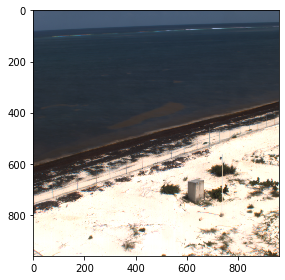

In [44]:
imshow(images[10])
plt.show()

In [45]:
def split_image(image, num_images, verbose=False):
    """
    Splits an image (ndarray) into 'num_images' images and returns the splitted
    images

    Parameters:
    -----------
    'image': numpy ndarray
        'image' must be a squared 2D numpy array 

    'num_images': int
        indicates the number of images to be returned

    Returns:
    --------
    'splitted_images': numpy ndarray
    """
    (width, height, rgb) = image.shape
    if width != height: raise Exception('image must be a squared ndarray')
    num_windows = int(np.sqrt(num_images))
    window_size = width // num_windows
    if verbose:
        print(f"\tImage of size ({width}x{height}). Window size: {window_size}")
    splitted_images = []
    y = 0
    while (y+window_size <= height):
        x = 0
        while (x+window_size <= width):
            if verbose: print(f"\t({x},{x+window_size}:{y},{y+window_size})\t", end='')
            splitted_images.append(image[x:x+window_size, y:y+window_size])
            x += window_size
        if verbose: print()
        y += window_size
    return np.array(splitted_images)

In [46]:
def split_images(images, num_images, base_path):
    for img_idx, image in enumerate(images):
        splitted_images = split_image(image, num_images)
        for idx, sp in enumerate(splitted_images):
            imsave(base_path + "IM_" + str(img_idx) + '_' + str(idx) + ".png", sp)

In [48]:
train_images, test_images = train_test_split(images, test_size=0.2)
num_window = 10
split_images(train_images, num_images=num_window**2, base_path=TRAIN_PATH)
split_images(test_images, num_images=num_window**2, base_path=TEST_PATH)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-46-ab0f55b879e6>:5: UserWarning: dataset/train/IM_0_2.png is a low contrast image
  imsave(base_path + "IM_" + str(img_idx) + '_' + str(idx) + ".png", sp)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-46-ab0f55b879e6>:5: UserWarning: dataset/train/IM_0_3.png is a low contrast image
  imsave(base_path + "IM_" + str(img_idx) + '_' + str(idx) + ".png", sp)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-46-ab0f55b879e6>:5: UserWarning: dataset/train/IM_0_4.png is a low contrast image
  imsave(base_path + "IM_" + str(img_idx) + '_' + str(idx) + ".png", sp)
Lossy conversi

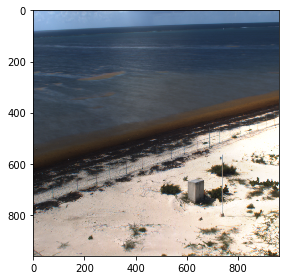

In [37]:
imshow(train_images[0])